In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
countries=pd.read_csv("countries.csv")

In [33]:
countries.shape

(245, 6)

In [34]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  245 non-null    int64  
 1   Unnamed: 0    245 non-null    int64  
 2   country       244 non-null    object 
 3   latitude      244 non-null    float64
 4   longitude     244 non-null    float64
 5   name          245 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 11.6+ KB


In [35]:
countries.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
country          object
latitude        float64
longitude       float64
name             object
dtype: object

In [36]:
countries.head()

,Unnamed: 0.1,Unnamed: 0,country,latitude,longitude,name
0,0,0,AD,42.546245,1.601554,Andorra
1,1,1,AE,23.424076,53.847818,United Arab Emirates
2,2,2,AF,33.939110,67.709953,Afghanistan
3,3,3,AG,17.060816,-61.796428,Antigua and Barbuda
4,4,4,AI,18.220554,-63.068615,Anguilla


In [37]:
countries.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
country         1
latitude        1
longitude       1
name            0
dtype: int64

In [38]:
countries=countries.dropna(axis=0)
# countries.isna().sum()

In [39]:
countries.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
country         0
latitude        0
longitude       0
name            0
dtype: int64

In [40]:
countries.shape

(243, 6)

In [42]:
df_coordinates=countries[['longitude','latitude']].copy()

In [43]:
df_coordinates.head()

,longitude,latitude
0,1.601554,42.546245
1,53.847818,23.424076
2,67.709953,33.939110
3,-61.796428,17.060816
4,-63.068615,18.220554


In [44]:
countries.country.nunique()

243

In [45]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(df_coordinates)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [46]:
inertia_values=[]
for n in range(2,8):
    kmeans=KMeans(n_clusters=n, n_init=10)
    kmeans.fit(df_coordinates)
    error=kmeans.inertia_
    inertia_values.append(error)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

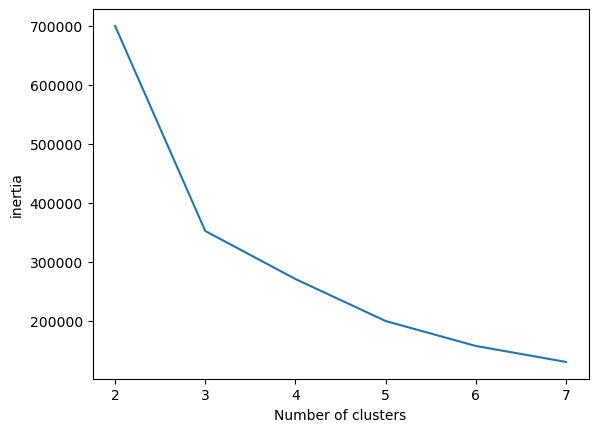

In [47]:
plt.plot(list(range(2,8)), inertia_values)
plt.xlabel("Number of clusters")
plt.ylabel('inertia')
plt.show()